In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn

In [2]:
dw = pd.read_csv("/Users/schluj05/data/MSKCCDATA/olin/Cell population frequencies.csv")
dw['T'] = dw['Time.point'].apply(lambda t: 1 if t=='Birth' else(0 if t == 'Cord blood' else(2 if t=='Week 1' else(3 if t == 'Week 4' else 4))))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/schluj05/data/MSKCCDATA/olin/Cell population frequencies.csv'

In [4]:
dw.sort_values('T').groupby('T').agg(['mean', 'var'])['CD14pos_monocytes']

,mean,var
T,,
0,0.072858,0.002251
1,0.060240,0.000712
2,0.124783,0.003571
3,0.113825,0.002148
4,0.063115,0.000843


In [5]:
dw['lymphocytes'] = dw[['CD27neg_Switched_memory_B_cells',
       'CD27pos_Switched_memory_B_cells', 'CD4pos_central_memory_T_cells',
       'CD4pos_effector_memory_T_cells', 'CD4pos_Naive_T_cells',
       'CD4pos_T_EMRA', 'CD56bright_NK_cells', 'CD56dim_NK_cells',
       'CD8pos_central_memory_T_cells', 'CD8pos_effector_memory_T_cells',
       'CD8pos_Naive_T_cells', 'CD8pos_T_EMRA', 'Naive_B_cells',
       'Plasmablasts', 'Unswitched_memory_B_cells',]].sum(axis=1)

In [6]:
print(dw.columns)
dw.head()

Index(['Subject', 'Sample', 'Time.point', 'Gadays', 'Gender',
       'mode_of_delivery', 'Relation', 'Group', 'Family', 'birth_weight_g',
       'birth_length_cm', 'mother_age_yr', 'father_age_yr', 'Days_after_birth',
       'Gestational_age', 'CD27neg_Switched_memory_B_cells',
       'CD27pos_Switched_memory_B_cells', 'CD4pos_central_memory_T_cells',
       'CD4pos_effector_memory_T_cells', 'CD4pos_Naive_T_cells',
       'CD4pos_T_EMRA', 'CD56bright_NK_cells', 'CD56dim_NK_cells',
       'CD8pos_central_memory_T_cells', 'CD8pos_effector_memory_T_cells',
       'CD8pos_Naive_T_cells', 'CD8pos_T_EMRA', 'Naive_B_cells',
       'Plasmablasts', 'Unswitched_memory_B_cells', 'basophils', 'Neutrophils',
       'plasmacytoid_DCs', 'CD14pos_monocytes', 'Endothelial_cells', 'mDCs',
       'T', 'lymphocytes'],
      dtype='object')


,Subject,Sample,Time.point,Gadays,Gender,mode_of_delivery,Relation,Group,Family,birth_weight_g,...,Plasmablasts,Unswitched_memory_B_cells,basophils,Neutrophils,plasmacytoid_DCs,CD14pos_monocytes,Endothelial_cells,mDCs,T,lymphocytes
0,118-F,66593980,Birth,188,1.0,NaN,Father,Premature,44.0,NaN,...,0.000450,0.000923,0.001756,0.411444,0.000360,0.059495,0.001666,0.003220,1,0.522057
1,118,66600173,Cord blood,188,2.0,Vaginal,Child,Premature,44.0,992.0,...,0.000011,0.000110,0.000823,0.770621,0.000296,0.029692,0.007141,0.011835,0,0.179592
2,118,66600230,Week 1,188,2.0,Vaginal,Child,Premature,44.0,992.0,...,0.000000,0.000275,0.000728,0.534353,0.000405,0.061731,0.003592,0.007476,2,0.391715
3,118,66627209,Week 4,188,2.0,Vaginal,Child,Premature,44.0,992.0,...,0.000135,0.000067,0.003034,0.504584,0.000135,0.064889,0.021270,0.000978,3,0.405110
4,118,66627236,Week 12,188,2.0,Vaginal,Child,Premature,44.0,992.0,...,0.000212,0.001439,0.002158,0.160799,0.001566,0.081330,0.003089,0.004443,4,0.746615


In [7]:
dw.lymphocytes.describe()

count    337.000000
mean       0.350253
std        0.191246
min        0.042491
25%        0.204991
50%        0.300132
75%        0.461109
max        0.911670
Name: lymphocytes, dtype: float64

In [8]:
_dm = pd.read_csv("/Users/schluj05/data/MSKCCDATA/olin/ALL.unoise.vsearch.tsv", sep="\t", header="infer")

In [9]:
dm = _dm.set_index('#OTU').T
dm.columns.name = None
dm.index.name = "Sample"

In [10]:
dm.iloc[0:-3,:] = dm.iloc[0:-3,:].apply(lambda r: r/sum(r), axis=1)

In [11]:
dmtax = dm.iloc[-3::,:]
dm = dm.iloc[0:-3,:]

In [12]:
dmtaxt = dmtax.T
taxlevels = np.array(['Kingdom','Phylum', 'Class', 'Order','Family', 'Genus', 'Species' ])
tax = pd.DataFrame(index=dmtax.T.index, columns=taxlevels)

for ix, r in dmtaxt.iterrows():
    t = [x for x in r.Taxonomy.strip().split(';') if x!='']
    tls = taxlevels[0:len(t)]
    tax.loc[ix][tls] = t

        
for l in taxlevels:
    tax[l] = tax[l].fillna(l+'__'+pd.Series(tax.index, index=tax.index))    


In [13]:
dm_genus = dm.copy()
dm_genus.columns = tax.loc[dm_genus.columns].Genus
dm_genus = dm_genus.groupby(dm_genus.columns, axis=1).sum()
dm_genus = dm_genus[dm_genus.sum().sort_values(ascending=False).index]

In [143]:
dm_family = dm.copy()
dm_family.columns = tax.loc[dm_family.columns].Family
dm_family = dm_family.groupby(dm_family.columns, axis=1).sum()
dm_family = dm_family[dm_family.sum().sort_values(ascending=False).index]

In [144]:
dm_phylum = dm.copy()
dm_phylum.columns = tax.loc[dm_phylum.columns].Phylum
dm_phylum = dm_phylum.groupby(dm_phylum.columns, axis=1).sum()
dm_phylum = dm_phylum[dm_phylum.sum().sort_values(ascending=False).index]

In [16]:
# prevo = dm[dm.columns[dmtax.loc["Taxonomy"].apply(lambda v: 'Prevotellaceae' in v)]]
# prevo.columns = dmtax[dmtax.columns[dmtax.loc["Taxonomy"].apply(lambda v: 'Prevotellaceae' in v)]].loc["Taxonomy"]
# plt.scatter((prevo.sum(axis=1)+0.000001).apply(np.log), dw.set_index("Sample").loc[prevo.index]['CD14pos_monocytes'].apply(np.log))

In [17]:
dm_genus.sum().head(20)

Genus
Escherichia-Shigella             14.696865
Staphylococcus                   14.230255
Klebsiella                        9.646720
Veillonella                       9.503648
Enterobacter                      8.042230
Bifidobacterium                   6.860858
Clostridium_sensu_stricto_1       6.842094
Enterococcus                      5.280107
Bacteroides                       4.275445
Haemophilus                       2.623329
Burkholderia-Paraburkholderia     2.581274
Akkermansia                       2.367027
Achromobacter                     1.717943
Serratia                          1.601600
Pseudomonas                       1.552769
Blautia                           1.427524
Genus__Uniq27                     1.270850
Ralstonia                         0.880637
Lachnoclostridium                 0.588474
Peptoclostridium                  0.587041
dtype: float64

In [18]:
np.argmax(dm_genus.columns=='Lachnoclostridium')


18

In [19]:
dm_genus.columns

Index(['Escherichia-Shigella', 'Staphylococcus', 'Klebsiella', 'Veillonella',
       'Enterobacter', 'Bifidobacterium', 'Clostridium_sensu_stricto_1',
       'Enterococcus', 'Bacteroides', 'Haemophilus',
       ...
       'Genus__Uniq88053', 'Gemmatimonas', 'Genus__Uniq108972',
       'Genus__Uniq104467', 'Genus__Uniq101064', 'Nocardioides',
       'Genus__Uniq96786', 'Genus__Uniq86181', 'Genus__Uniq114015',
       'Herbaspirillum'],
      dtype='object', name='Genus', length=763)

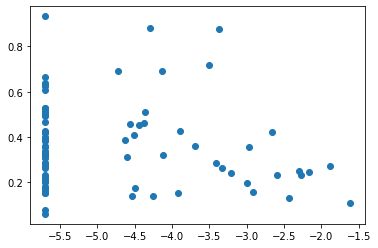

In [86]:
_tax = 'Lactobacillus'
wbc = 'Neutrophils'
taxon = dm_genus[_tax]+2e-6
_t = taxon.apply(np.log10).replace([np.inf, -np.inf], np.nan).dropna()
_w = (dw.set_index("Sample")[wbc])

_w = _w.reindex(set(_t.index).intersection(_w.index))
_t = _t.reindex(set(_t.index).intersection(_w.index))


plt.scatter(_t,_w )

dreg = pd.DataFrame(columns=['wbc', 'taxon', 'T'])
dreg['NLR'] = _w/dw.set_index("Sample").loc[_t.index]['lymphocytes']
dreg['wbc'] = _w.apply(np.log10).replace([np.inf, -np.inf], np.nan).dropna()
dreg['monocytes'] = dw.set_index("Sample").loc[_t.index]['CD14pos_monocytes'].apply(np.log10)
dreg['lymphocytes'] = dw.set_index("Sample").loc[_t.index]['lymphocytes'].apply(np.log10)

dreg['taxon'] = _t
dreg['subject'] = dw.set_index("Sample").loc[_t.index].Subject
dreg['T'] = dw.set_index("Sample").loc[_t.index]['T']



In [87]:
wbcmodulatortax = ['Faecalibacterium','Akkermansia','Veillonella','Bacteroides','Clostridium_sensu_stricto_1', 'Rothia','Ruminococcus_gnavus_group', 
                   'Ruminococcus_torques_group', 'Ruminococcaceae_UCG-013','Ruminococcaceae_UCG-005','Ruminococcaceae_UCG-010']

dreg = dreg.join(dm_genus[list(wbcmodulatortax)])
dreg['Ruminococcaceae'] = dreg[['Ruminococcaceae_UCG-013','Ruminococcaceae_UCG-005','Ruminococcaceae_UCG-010']].sum(axis=1)

dreg[list(wbcmodulatortax)+['Ruminococcaceae']] = (dreg[list(wbcmodulatortax)+['Ruminococcaceae']]+2e-6).applymap(np.log10)
                 
dreg['cT'] = pd.Categorical(dreg['T'])
dreg.to_csv("r_analyses_phyloumap/olin_for_r.csv")

In [80]:
from scipy.spatial.distance import pdist, squareform

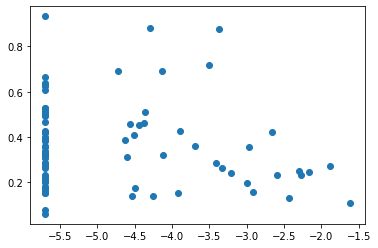

In [315]:
_tax = 'Lactobacillus'
wbc = 'Neutrophils'
taxon = dm_genus[_tax]+2e-6
_t = taxon.apply(np.log10).replace([np.inf, -np.inf], np.nan).dropna()
_w = (dw.set_index("Sample")[wbc])

_w = _w.reindex(set(_t.index).intersection(_w.index))
_t = _t.reindex(set(_t.index).intersection(_w.index))


plt.scatter(_t,_w )

dreg = pd.DataFrame(columns=['wbc', 'taxon', 'T'])
dreg['NLR'] = _w/dw.set_index("Sample").loc[_t.index]['lymphocytes']
dreg['wbc'] = _w.apply(np.log10).replace([np.inf, -np.inf], np.nan).dropna()
dreg['monocytes'] = dw.set_index("Sample").loc[_t.index]['CD14pos_monocytes'].apply(np.log10)
dreg['lymphocytes'] = dw.set_index("Sample").loc[_t.index]['lymphocytes'].apply(np.log10)

dreg['taxon'] = _t
dreg['subject'] = dw.set_index("Sample").loc[_t.index].Subject
dreg['T'] = dw.set_index("Sample").loc[_t.index]['T']

wbcmodulatortax = ['Faecalibacterium','Akkermansia','Veillonella','Bacteroides','Clostridium_sensu_stricto_1', 'Rothia','Ruminococcus_gnavus_group', 
                   'Ruminococcus_torques_group', 'Ruminococcaceae_UCG-013','Ruminococcaceae_UCG-005','Ruminococcaceae_UCG-010']

dreg = dreg.join(dm_genus).join(dm).join(dm_family).join(dm_phylum)

all_cols = dm_genus.columns.to_list() + dm.columns.to_list() + dm_family.columns.to_list() + dm_phylum.columns.to_list()
# dreg['Ruminococcaceae'] = dreg[['Ruminococcaceae_UCG-013','Ruminococcaceae_UCG-005','Ruminococcaceae_UCG-010']].sum(axis=1)

#dreg[list(wbcmodulatortax)+['Ruminococcaceae']] = (dreg[list(wbcmodulatortax)+['Ruminococcaceae']]+2e-6).applymap(np.log10)
                 
dreg['cT'] = pd.Categorical(dreg['T'])

dreg = dreg.sort_values("T")
dreg["time_weeks"] = dreg.join(dw.set_index("Sample")["Time.point"])["Time.point"].apply(lambda v: 12. if "12" in v else (4. if "4" in v else 1.))
dreg.to_csv("r_analyses_phyloumap/unlogged.csv")

In [291]:
pdists = np.hstack(
    [
#        squareform(pdist(dreg[dm.columns], metric="cityblock")),
        squareform(pdist(dreg[dm_genus.columns], metric="cityblock")),
        squareform(pdist(dreg[dm_family.columns], metric="cityblock")),
#        squareform(pdist(dreg[dm_phylum.columns], metric="cityblock"))
    ],
)

In [292]:
pdists.shape[1]/83

2.0

In [293]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

tsne = TSNE(perplexity=6, early_exaggeration=1)

tsnefit = tsne.fit_transform(pdists, )

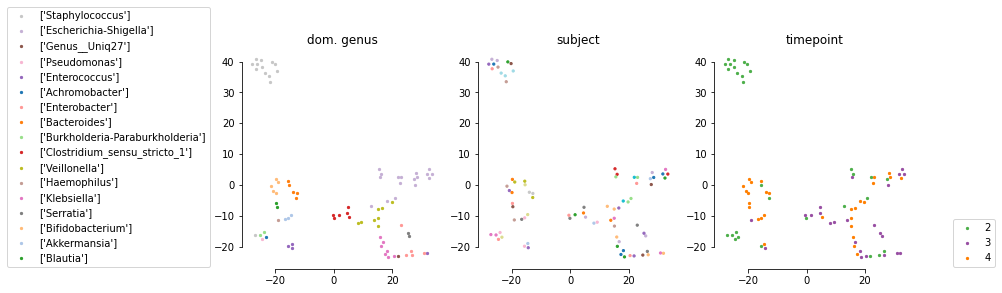

In [299]:
fig, axs = plt.subplots(ncols=3, figsize=(12,4))
[ax1, ax2, ax3] = axs

dom_genus_lenc = LabelEncoder().fit(dreg[dm_genus.columns].idxmax(axis=1))
dom_genus = dom_genus_lenc.transform(dreg[dm_genus.columns].idxmax(axis=1))
dom_genus_colors_cm = matplotlib.cm.tab20(dom_genus)
for _g, _c in dict(zip(dom_genus,dom_genus_colors_cm)).items():
    ix = dom_genus == _g
    ax1.scatter(tsnefit[ix,0], tsnefit[ix,1], c=matplotlib.colors.rgb2hex(_c),label=dom_genus_lenc.inverse_transform([_g]),
               s=5)
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc=(-1.2,0))


    
ax2.scatter(tsnefit[:,0], tsnefit[:,1], cmap="tab20", c=LabelEncoder().fit_transform(dreg.subject), label=dreg.index,
           s=5)#.apply(lambda v: np.log10(v+2e-6)))

tC_colors_cm = matplotlib.cm.Set1(dreg.cT.astype(int))
for  _g, _c in dict(zip(dreg.cT.astype(int), tC_colors_cm)).items():
    ix = dreg.cT.astype(int).values == _g
    ax3.scatter(tsnefit[ix,0], tsnefit[ix,1], c=matplotlib.colors.rgb2hex(_c),label=_g,
               s=5)

handles, labels = ax3.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax3.legend(by_label.values(), by_label.keys(), loc=(1.2,0))


[ax.set_title(t) for (ax, t) in zip(axs, ["dom. genus", "subject", "timepoint"])]
[sns.despine(offset=2,trim=True, ax=ax) for ax in axs]
fig.savefig("ts-olin-by-dominan-genus.png", dpi=250, bbox_inches="tight")

In [300]:
dreg["NLR"]

Sample
66600164    0.460573
66627259    0.540295
66627260    0.852026
66627266    1.166161
66627268    1.182118
              ...   
66627299    0.137184
66627298    0.452923
66627297    0.197189
66627236    0.215371
66627239    0.412765
Name: NLR, Length: 83, dtype: float64

In [277]:
dreg.cT.isna().value_counts()

False    83
Name: cT, dtype: int64

In [ ]:
dreg.Staphylococcus
